##Hand Written Digit Prediction - Classification Analysis

The digits dataset consists of 8x8 pixel images of digits . The image attributes of the dataset stores 8x8 arrays of grayscale value for each image . We will use these arrays to visualize the first 4 image . The target attribute
of the dataset stores the digit each image represents

##import Library

In [3]:
import pandas as pd

In [2]:
import numpy as np

In [1]:
import matplotlib.pyplot as plt

##Import Data

In [4]:
from sklearn.datasets import load_digits

In [5]:
df = load_digits()

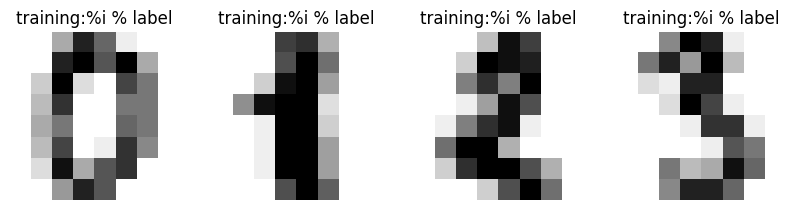

In [7]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("training:%i % label")

##Data preprocessing

In [10]:
df.images.shape

(1797, 8, 8)

In [11]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [12]:
df.images[0].shape

(8, 8)

In [13]:
len(df.images)

1797

In [14]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [15]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [16]:
data[0].shape

(64,)

In [17]:
data.shape

(1797, 64)

##Scaling Image Data

In [18]:
data.min()

0.0

In [19]:
data.max()

16.0

In [21]:
data = data/16

In [23]:
data.min()

0.0

In [22]:
data.max()

0.0625

In [24]:
data.max()

0.0625

In [25]:
data[0]

array([0.        , 0.        , 0.01953125, 0.05078125, 0.03515625,
       0.00390625, 0.        , 0.        , 0.        , 0.        ,
       0.05078125, 0.05859375, 0.0390625 , 0.05859375, 0.01953125,
       0.        , 0.        , 0.01171875, 0.05859375, 0.0078125 ,
       0.        , 0.04296875, 0.03125   , 0.        , 0.        ,
       0.015625  , 0.046875  , 0.        , 0.        , 0.03125   ,
       0.03125   , 0.        , 0.        , 0.01953125, 0.03125   ,
       0.        , 0.        , 0.03515625, 0.03125   , 0.        ,
       0.        , 0.015625  , 0.04296875, 0.        , 0.00390625,
       0.046875  , 0.02734375, 0.        , 0.        , 0.0078125 ,
       0.0546875 , 0.01953125, 0.0390625 , 0.046875  , 0.        ,
       0.        , 0.        , 0.        , 0.0234375 , 0.05078125,
       0.0390625 , 0.        , 0.        , 0.        ])

##Train Test Split Data

In [27]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [35]:
x_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

##Random Forest Model

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf = RandomForestClassifier()

In [39]:
rf.fit(x_train, y_train)

RandomForestClassifier()

##Predict Test Data

In [41]:
y_pred = rf.predict(X_test)

In [42]:
y_pred

array([1, 4, 3, 1, 3, 6, 4, 7, 4, 9, 2, 2, 8, 7, 4, 5, 3, 9, 0, 2, 0, 7,
       4, 6, 1, 8, 5, 2, 0, 0, 0, 4, 7, 9, 0, 2, 9, 4, 9, 6, 2, 2, 5, 5,
       7, 5, 1, 1, 5, 8, 7, 7, 4, 4, 9, 8, 3, 8, 2, 2, 8, 3, 1, 9, 7, 0,
       2, 9, 2, 5, 4, 5, 0, 0, 9, 7, 5, 1, 4, 2, 1, 0, 1, 0, 1, 4, 1, 9,
       3, 1, 3, 6, 3, 6, 9, 2, 3, 4, 2, 2, 3, 1, 5, 4, 7, 3, 1, 0, 5, 6,
       1, 7, 4, 1, 6, 9, 1, 4, 4, 4, 8, 1, 3, 4, 6, 9, 5, 4, 6, 5, 3, 4,
       1, 2, 2, 5, 7, 3, 8, 7, 0, 2, 1, 0, 2, 8, 5, 7, 5, 4, 7, 9, 1, 7,
       7, 8, 3, 8, 9, 2, 1, 1, 3, 9, 1, 3, 8, 2, 5, 6, 4, 3, 7, 4, 9, 5,
       2, 2, 7, 4, 3, 8, 5, 3, 0, 6, 7, 7, 2, 5, 9, 0, 7, 0, 5, 6, 2, 9,
       1, 5, 0, 6, 5, 5, 1, 6, 1, 7, 4, 1, 6, 2, 3, 9, 9, 0, 9, 2, 3, 3,
       1, 4, 4, 6, 1, 5, 7, 4, 2, 0, 3, 1, 2, 0, 4, 4, 8, 0, 4, 6, 7, 6,
       8, 4, 0, 0, 7, 7, 8, 1, 6, 8, 2, 2, 9, 7, 9, 6, 1, 1, 3, 7, 1, 3,
       7, 0, 6, 2, 8, 0, 8, 3, 0, 5, 2, 3, 0, 4, 1, 8, 0, 4, 0, 3, 9, 9,
       4, 0, 7, 2, 3, 2, 6, 8, 4, 1, 7, 3, 0, 3, 2,

##Model Accuracy

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

In [44]:
confusion_matrix(y_test, y_pred)

array([[52,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 63,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 62,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 58,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 54,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  1,  0, 42,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 47,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 51,  0,  1],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 51,  1],
       [ 0,  0,  0,  2,  1,  1,  0,  1,  1, 44]])

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.95      1.00      0.98        63
           2       0.98      1.00      0.99        62
           3       0.95      1.00      0.97        58
           4       0.93      1.00      0.96        54
           5       0.98      0.98      0.98        43
           6       1.00      1.00      1.00        47
           7       0.98      0.96      0.97        53
           8       0.98      0.91      0.94        56
           9       0.96      0.88      0.92        50

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540

